# 2. Divide and Conquer (Sorting)

- **Created by Dr. Ajay

Write a python program to perform **Countingsort**.
* Statement:  Given a disordered list of repeated integers, rearrange the integers in natural order.
 Sample Input: [4,3,2,1,4,3,2,4,3,4]
 Sample Output: [1,2,2,3,3,3,4,4,4,4]

Time Complexity of Solution: Best Case O(n+k); Average Case O(n+k); Worst Case O(n+k), where n is the size of the input array and k means the values range from 0 to k.
- Approach:
Counting sort, like radix sort and bucket sort, is an integer based algorithm (i.e. the values of the input array are assumed to be integers). Hence counting sort is among the fastest sorting algorithms around, in theory. The  particular distinction for counting sort is that it creates a bucket for each value and keep a counter in each bucket. Then each time a value is encountered in the input collection, the appropriate counter is incremented. Because counting sort creates a bucket for each value, an imposing restriction is that the maximum value in the input array be known beforehand. Bucket sort uses a hash function to distribute values; counting sort, on the other hand, creates a counter for each value -- hence the name.
- Implementation notes:
1. Since the values range from 0 to k, create k+1 buckets.

2. To fill the buckets, iterate through the input list and
each time a value appears, increment the counter in its bucket.
3. Now fill the input list with the compressed data in the
buckets. Each bucket's key represents a value in the  array. So for each bucket, from smallest key to largest, add the index of the bucket to the input array and decrease the counter in said bucket by one; until the counter is zero.

 Input: [4, 3, 2, 1, 4, 3, 2, 4, 3, 4]
 Output: [1, 2, 2, 3, 3, 3, 4, 4, 4, 4]


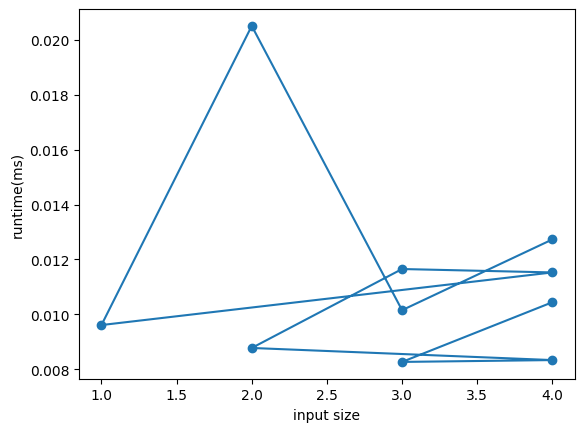

0.010442999951010279


In [9]:
#write code for above cell and compute the running time and also plot graph.
import random
import timeit
import matplotlib.pyplot as plt
def counting_sort(arr):
  if not arr:
    return []
  max1 = max(arr)
  count = [0] * (max1 + 1)
  for num in arr:
    count[num] += 1
  sorted_arr = []
  for i in range(max1 + 1):
    while count[i] > 0:
      sorted_arr.append(i)
      count[i] -= 1
  return sorted_arr
input = [4,3,2,1,4,3,2,4,3,4]
time=[]
sorted = counting_sort(input)
print(f" Input: {input}")
print(f" Output: {sorted}")
for n in input:
  arr=[random.randint(1,100) for _ in range(n)]
  runtime=timeit.timeit(lambda: counting_sort(arr.copy()),number=1)*1000
  time.append(runtime)

plt.plot(input,time,marker='o')
plt.xlabel("input size")
plt.ylabel("runtime(ms)")
plt.show()
print(runtime)

 - *Bucketsort*
Statement:
Given a disordered list of integers, rearrange them in natural order.
 Sample Input: [8,5,3,1,9,6,0,7,4,2,5]
 Sample Output: [0,1,2,3,4,5,6,7,8,9,5]
Time Complexity of Solution:
Best Case O(n); Average Case O(n); Worst Case O(n).
- Approach:
If it sounds too good to be true, then most likely it's not true. Bucketsort is not an exception to this adage. For bucketsort to
work at its blazing efficiency, there are multiple prerequisites.
First the hash function that is used to partition the elements need
to be very good and must produce ordered hash: if i < k then
hash(i) < hash(k). Second, the elements to be sorted must be
uniformly distributed.
  The aforementioned aside, bucket sort is actually very good
considering that counting sort is reasonably speaking its upper
bound. And counting sort is very fast. The particular distinction
for bucket sort is that it uses a hash function to partition the
keys of the input array, so that multiple keys may hash to the same
bucket. Hence each bucket must effectively be a growable list;
similar to radix sort.


Sample Input: [8, 5, 3, 1, 9, 6, 0, 7, 4, 2, 5]
Sample Output: [0, 1, 2, 3, 4, 5, 5, 6, 7, 8, 9]

Measuring performance for varying input size (n)... 
  n=100, Time=0.000123 seconds
  n=500, Time=0.000922 seconds
  n=1000, Time=0.002858 seconds
  n=2000, Time=0.009946 seconds
  n=5000, Time=0.063641 seconds
  n=10000, Time=0.282741 seconds
  n=20000, Time=1.164312 seconds


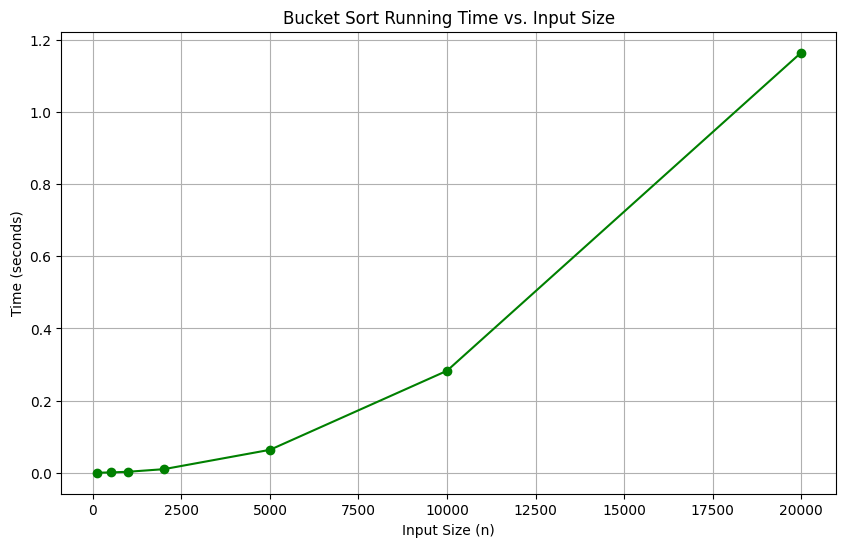

In [20]:
#write code for above cell and compute the running time and also plot graph.
import matplotlib.pyplot as plt
import numpy as np
import timeit

def insertion_sort(bucket):
    for i in range(1, len(bucket)):
        up = bucket[i]
        j = i - 1
        while j >= 0 and bucket[j] > up:
            bucket[j + 1] = bucket[j]
            j -= 1
        bucket[j + 1] = up

def bucketsort(arr):
    if not arr:
        return []
    max_val = max(arr)
    min_val = min(arr)
    range_val = max_val - min_val

    if range_val == 0:
        return arr
    num_buckets = 10
    bucket_size = (range_val + 1) / num_buckets if num_buckets > 0 else 1

    buckets = [[] for _ in range(num_buckets)]

    for x in arr:
        if range_val == 0:
            bucket_index = 0
        else:

            bucket_index = min(int((x - min_val) / bucket_size), num_buckets - 1)
        buckets[bucket_index].append(x)
    sorted_arr = []
    for bucket in buckets:
        insertion_sort(bucket)
        sorted_arr.extend(bucket)

    return sorted_arr
sample_input = [8,5,3,1,9,6,0,7,4,2,5]
sorted_sample = bucketsort(list(sample_input))
print(f"Sample Input: {sample_input}")
print(f"Sample Output: {sorted_sample}")
input_sizes = [100, 500, 1000, 2000, 5000, 10000, 20000]
max_val_for_n = 10000
times_n = []

print("\nMeasuring performance for varying input size (n)... ")
for n in input_sizes:
    arr = list(np.random.randint(0, max_val_for_n, n))

    start_time = timeit.default_timer()
    bucketsort(list(arr))
    end_time = timeit.default_timer()
    times_n.append(end_time - start_time)
    print(f"  n={n}, Time={times_n[-1]:.6f} seconds")

plt.figure(figsize=(10, 6))
plt.plot(input_sizes, times_n, marker='o', color='green')
plt.title('Bucket Sort Running Time vs. Input Size')
plt.xlabel('Input Size (n)')
plt.ylabel('Time (seconds)')
plt.grid(True)
plt.show()

**Radix sort**
Statement:Given a disordered list of integers, rearrange them in natural order.
Sample Input: [18,5,100,3,1,19,6,0,7,4,2]
Sample Output: [0,1,2,3,4,5,6,7,18,19,100]
Time Complexity of Solution:Best Case O(kn); Average Case O(kn); Worst Case O(kn),where k is the length of the longest number and n is the size of the input array.Note: if k is greater than log(n) then an nlog(n) algorithm would be a better fit. In reality we can always change the radix to make k less than log(n).
- Approach: radix sort, like counting sort and bucket sort, is an integer based algorithm (i.e. the values of the input array are assumed to be integers). Hence radix sort is among the fastest sorting algorithms around, in theory. The particular distinction for radix sort is that it creates a bucket for each cipher (i.e. digit); as such, similar to bucket sort, each bucket in radix sort must be a
growable list that may admit different keys. For decimal values, the number of buckets is 10, as the decimal system has 10 numerals/cyphers (i.e. 0,1,2,3,4,5,6,7,8,9). Then the keys are continuously sorted by significant digits.

Sample Input: [18, 5, 100, 3, 1, 19, 6, 0, 7, 4, 2]
Sample Output: [0, 1, 2, 3, 4, 5, 6, 7, 18, 19, 100]

Measuring performance for varying input size (n)...
  n=100, Time=0.000359 seconds
  n=500, Time=0.001623 seconds
  n=1000, Time=0.003224 seconds
  n=2000, Time=0.007129 seconds
  n=5000, Time=0.016543 seconds
  n=10000, Time=0.033598 seconds
  n=20000, Time=0.069041 seconds


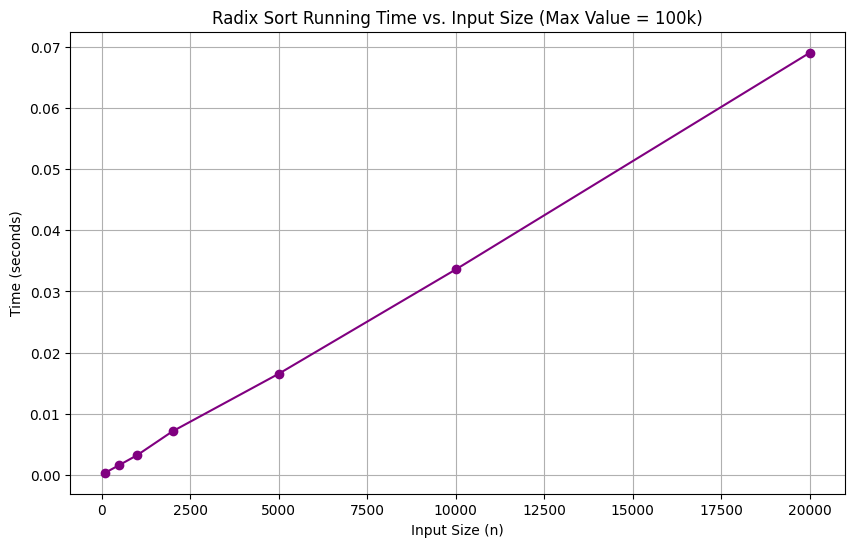


Measuring performance for varying number of digits (k) with fixed n...
  Max Value=10, Time=0.015196 seconds
  Max Value=100, Time=0.024517 seconds
  Max Value=1000, Time=0.026561 seconds
  Max Value=10000, Time=0.026873 seconds
  Max Value=100000, Time=0.033494 seconds
  Max Value=1000000, Time=0.040120 seconds


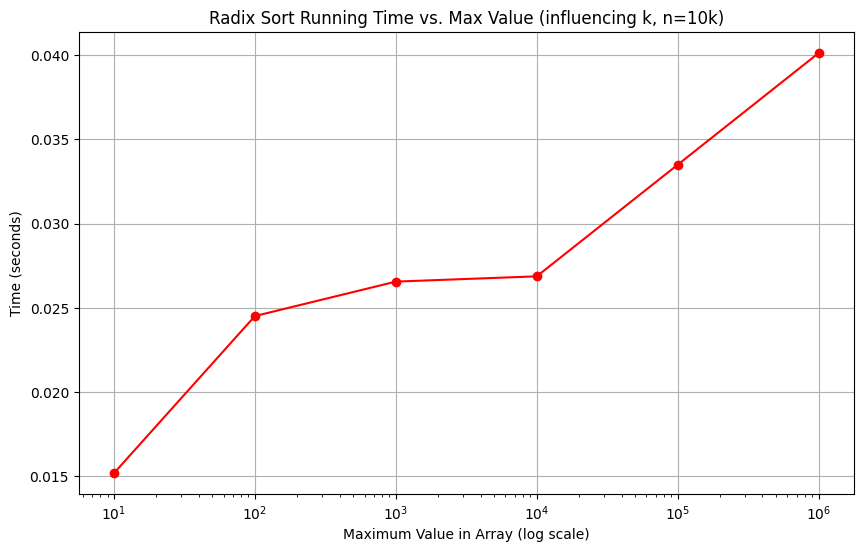

In [33]:
#write code for above cell and compute the running time and also plot graph.
import matplotlib.pyplot as plt
import numpy as np
import timeit

def countingSort_radix(arr, exp):
    n = len(arr)
    output = [0] * n
    count = [0] * 10
    for i in range(n):
        index = (arr[i] // exp) % 10
        count[index] += 1
    for i in range(1, 10):
        count[i] += count[i - 1]
    i = n - 1
    while i >= 0:
        index = (arr[i] // exp) % 10
        output[count[index] - 1] = arr[i]
        count[index] -= 1
        i -= 1
    for i in range(n):
        arr[i] = output[i]

def radix_sort(arr):
    if not arr:
        return []
    max_val = max(arr)
    exp = 1
    while max_val // exp > 0:
        countingSort_radix(arr, exp)
        exp *= 10
    return arr
sample_input = [18,5,100,3,1,19,6,0,7,4,2]
sorted_sample = radix_sort(list(sample_input))
print(f"Sample Input: {sample_input}")
print(f"Sample Output: {sorted_sample}")
input_sizes = [100, 500, 1000, 2000, 5000, 10000, 20000]
max_val_for_n = 100000
times_n = []

print("\nMeasuring performance for varying input size (n)...")
for n in input_sizes:

    arr = list(np.random.randint(0, max_val_for_n, n))

    start_time = timeit.default_timer()
    radix_sort(list(arr))
    end_time = timeit.default_timer()
    times_n.append(end_time - start_time)
    print(f"  n={n}, Time={times_n[-1]:.6f} seconds")

plt.figure(figsize=(10, 6))
plt.plot(input_sizes, times_n, marker='o', color='purple')
plt.title('Radix Sort Running Time vs. Input Size (Max Value = 100k)')
plt.xlabel('Input Size (n)')
plt.ylabel('Time (seconds)')
plt.grid(True)
plt.show()


n_fixed_for_k_plot = 10000
max_k_values = [10, 100, 1000, 10000, 100000, 1000000]
times_k_plot = []

print("\nMeasuring performance for varying number of digits (k) with fixed n...")
for k_max in max_k_values:
    arr = list(np.random.randint(0, k_max + 1, n_fixed_for_k_plot))
    start_time = timeit.default_timer()
    radix_sort(list(arr))
    end_time = timeit.default_timer()
    times_k_plot.append(end_time - start_time)
    print(f"  Max Value={k_max}, Time={times_k_plot[-1]:.6f} seconds")

plt.figure(figsize=(10, 6))
plt.plot(max_k_values, times_k_plot, marker='o', color='red')
plt.xscale('log')
plt.title('Radix Sort Running Time vs. Max Value (influencing k, n=10k)')
plt.xlabel('Maximum Value in Array (log scale)')
plt.ylabel('Time (seconds)')
plt.grid(True)
plt.show()